In [25]:
import scipy.stats as stats
import numpy as np
import random
#import tabulate
import csv
import matplotlib.pyplot as plt

## Iris de Fisher
Ce jeu de données a été présenté en 1936 par Ronald Fisher comme un exemple d'application. Ces données ont été collectés par Edgar Anderson : "Toutes sont du même champ, cueillies le même jour et mesurées le même jour par la même personne avec les mêmes outils de mesures".

Le jeu de données comprend 50 échantillons de chacune des trois espèces d'iris (Iris setosa, Iris virginica et Iris versicolor).  Quatre caractéristiques ont été mesurées à partir de chaque échantillon : la longueur et la largeur des sépales et des pétales, en centimètres.

<figure>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/800px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="setosa" style="width: 200px;"/>
<center> <figcaption>Setosa </figcaption> </center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/1280px-Iris_versicolor_3.jpg" alt="versicolor" style="width: 200px;"/>
<center> <figcaption>Versicolor </figcaption> </center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/1024px-Iris_virginica.jpg" alt="viginica" style="width: 200px;"/>
<center> <figcaption>Virginica </figcaption> </center>
</figure>

In [26]:
list(csv.reader(open('iris_dataset.csv','r')))

[['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
 ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'],
 ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'],
 ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'],
 ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa'],
 ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa'],
 ['4.6', '3.4', '1.4', '0.3', 'Iris-setosa'],
 ['5.0', '3.4', '1.5', '0.2', 'Iris-setosa'],
 ['4.4', '2.9', '1.4', '0.2', 'Iris-setosa'],
 ['4.9', '3.1', '1.5', '0.1', 'Iris-setosa'],
 ['5.4', '3.7', '1.5', '0.2', 'Iris-setosa'],
 ['4.8', '3.4', '1.6', '0.2', 'Iris-setosa'],
 ['4.8', '3.0', '1.4', '0.1', 'Iris-setosa'],
 ['4.3', '3.0', '1.1', '0.1', 'Iris-setosa'],
 ['5.8', '4.0', '1.2', '0.2', 'Iris-setosa'],
 ['5.7', '4.4', '1.5', '0.4', 'Iris-setosa'],
 ['5.4', '3.9', '1.3', '0.4', 'Iris-setosa'],
 ['5.1', '3.5', '1.4', '0.3', 'Iris-setosa'],
 ['5.7', '3.8', '1.7', '0.3', 'Iris-setosa'],
 ['5.1', '3.8', '1.5', '0.3', 'Iris-setosa'],
 ['5.4', '3.4', '1.7', '0.2', 'Iris-setosa'],
 ['5.1', '3.7', '1.5', '0.4', 'Iri

In [27]:
dataset = list(csv.reader(open('iris_dataset.csv','r')))
varnames = ['sepal length [cm]', 'sepal width [cm]', 'petal length [cm]', 'petal width [cm]', 'class']
print ('nombre de données', len(dataset))
#print (tabulate.tabulate(dataset, varnames))

nombre de données 150


In [28]:
convert = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2 }
for row in dataset:
    for line in range(len(row)-1):
        row[line] = float(row[line])
    row[-1] = convert[row[-1]]


In [29]:
dataset

[[5.1, 3.5, 1.4, 0.2, 0],
 [4.9, 3.0, 1.4, 0.2, 0],
 [4.7, 3.2, 1.3, 0.2, 0],
 [4.6, 3.1, 1.5, 0.2, 0],
 [5.0, 3.6, 1.4, 0.2, 0],
 [5.4, 3.9, 1.7, 0.4, 0],
 [4.6, 3.4, 1.4, 0.3, 0],
 [5.0, 3.4, 1.5, 0.2, 0],
 [4.4, 2.9, 1.4, 0.2, 0],
 [4.9, 3.1, 1.5, 0.1, 0],
 [5.4, 3.7, 1.5, 0.2, 0],
 [4.8, 3.4, 1.6, 0.2, 0],
 [4.8, 3.0, 1.4, 0.1, 0],
 [4.3, 3.0, 1.1, 0.1, 0],
 [5.8, 4.0, 1.2, 0.2, 0],
 [5.7, 4.4, 1.5, 0.4, 0],
 [5.4, 3.9, 1.3, 0.4, 0],
 [5.1, 3.5, 1.4, 0.3, 0],
 [5.7, 3.8, 1.7, 0.3, 0],
 [5.1, 3.8, 1.5, 0.3, 0],
 [5.4, 3.4, 1.7, 0.2, 0],
 [5.1, 3.7, 1.5, 0.4, 0],
 [4.6, 3.6, 1.0, 0.2, 0],
 [5.1, 3.3, 1.7, 0.5, 0],
 [4.8, 3.4, 1.9, 0.2, 0],
 [5.0, 3.0, 1.6, 0.2, 0],
 [5.0, 3.4, 1.6, 0.4, 0],
 [5.2, 3.5, 1.5, 0.2, 0],
 [5.2, 3.4, 1.4, 0.2, 0],
 [4.7, 3.2, 1.6, 0.2, 0],
 [4.8, 3.1, 1.6, 0.2, 0],
 [5.4, 3.4, 1.5, 0.4, 0],
 [5.2, 4.1, 1.5, 0.1, 0],
 [5.5, 4.2, 1.4, 0.2, 0],
 [4.9, 3.1, 1.5, 0.1, 0],
 [5.0, 3.2, 1.2, 0.2, 0],
 [5.5, 3.5, 1.3, 0.2, 0],
 [4.9, 3.1, 1.5, 0.1, 0],
 [4.4, 3.0, 

On mélange et on séparare les données en 2 lots (entrainement et test)

In [45]:
random.shuffle(dataset)
train_set = np.array(dataset[0:100])
test_set = np.array(dataset[100:])

In [46]:
train_set[:,-1]==1 # True pour 'Iris-versicolor'

array([ True, False,  True, False, False, False, False, False, False,
       False,  True,  True, False, False,  True, False,  True, False,
       False,  True, False, False, False,  True, False,  True, False,
        True, False, False,  True,  True,  True, False, False,  True,
       False,  True, False,  True,  True, False, False, False,  True,
        True,  True, False, False, False,  True, False,  True,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False])

In [47]:
train_set[train_set[:,-1]==1] # permet de sélectionner les données 'Iris-versicolor'

array([[5.6, 3. , 4.5, 1.5, 1. ],
       [5.5, 2.5, 4. , 1.3, 1. ],
       [6.6, 2.9, 4.6, 1.3, 1. ],
       [6.4, 2.9, 4.3, 1.3, 1. ],
       [6.3, 3.3, 4.7, 1.6, 1. ],
       [6. , 2.9, 4.5, 1.5, 1. ],
       [5.7, 2.8, 4.1, 1.3, 1. ],
       [6.1, 2.8, 4. , 1.3, 1. ],
       [5.6, 3. , 4.1, 1.3, 1. ],
       [5.7, 2.6, 3.5, 1. , 1. ],
       [5.2, 2.7, 3.9, 1.4, 1. ],
       [5.5, 2.4, 3.8, 1.1, 1. ],
       [5.6, 2.9, 3.6, 1.3, 1. ],
       [6.2, 2.2, 4.5, 1.5, 1. ],
       [5.7, 3. , 4.2, 1.2, 1. ],
       [6.4, 3.2, 4.5, 1.5, 1. ],
       [5.8, 2.6, 4. , 1.2, 1. ],
       [5.6, 2.7, 4.2, 1.3, 1. ],
       [5. , 2. , 3.5, 1. , 1. ],
       [5.5, 2.6, 4.4, 1.2, 1. ],
       [5.6, 2.5, 3.9, 1.1, 1. ],
       [6.6, 3. , 4.4, 1.4, 1. ],
       [6.3, 2.3, 4.4, 1.3, 1. ],
       [5.7, 2.8, 4.5, 1.3, 1. ],
       [6.1, 2.8, 4.7, 1.2, 1. ],
       [5.1, 2.5, 3. , 1.1, 1. ],
       [6.1, 2.9, 4.7, 1.4, 1. ],
       [5.5, 2.4, 3.7, 1. , 1. ],
       [5.9, 3. , 4.2, 1.5, 1. ],
       [5.5, 2

Pour sélectionner la variable 'sepal length' (colonne 0) pour la classe 'Iris-versicolor' (1) :

In [48]:
train_set[train_set[:,-1]==1][:,0] 

array([5.6, 5.5, 6.6, 6.4, 6.3, 6. , 5.7, 6.1, 5.6, 5.7, 5.2, 5.5, 5.6,
       6.2, 5.7, 6.4, 5.8, 5.6, 5. , 5.5, 5.6, 6.6, 6.3, 5.7, 6.1, 5.1,
       6.1, 5.5, 5.9, 5.5, 4.9, 5.9, 6.5])

### Kernel Density Estimator
Construction d'une estimation de la fdp par la méthode du noyau à l'aide de la fonction ```gaussian_kde``` de ```scipy``` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html) :

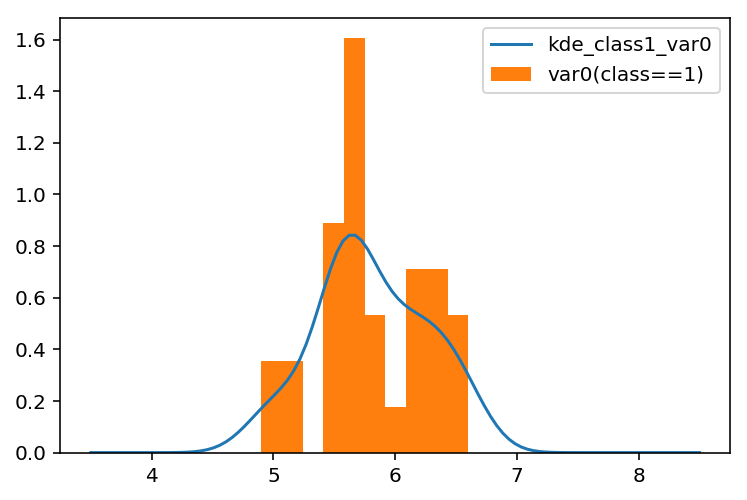

In [49]:
class1_var0 = train_set[train_set[..., -1]==1][..., 0]
kde_class1_var0 = stats.gaussian_kde(class1_var0)
x = np.linspace(3.5, 8.5, 100)
plt.plot(x, kde_class1_var0(x), label='kde_class1_var0')
plt.hist(class1_var0, density=True, label='var0(class==1)')
plt.legend()
plt.show()

In [50]:
list(set(train_set[...,-1]))

[0.0, 1.0, 2.0]

In [51]:
class NaiveBayes:
    """
    Naive Bayes Classifier
    
    self.kde is a dictionnary with one list per category. Each list contains 
    the kde pdfs (one for each variable) estimated from the trainning set 
    with the gaussian kde method. 
        kde[class0] = [kde_class0_0, kde_class0_1, ..., kde_class0_(nvar-1)]
        kde[class1] = ...
        ...
        
    The __call__ method returns the category for which the pdf is maximum:
        argmax_j ( prod_{i=0..(nvar-1)} kde_classj_i(data_i )
        
    """
    
    def __init__(self, dataset):
        """
        build kdes from training data 'dataset'
        
        """     
        self.nvar = len(dataset[0])-1
        self.classes = list(set(dataset[...,-1]))
        self.kde = { oneclass: [stats.gaussian_kde(dataset[dataset[:,-1]==oneclass][:,var]) 
                                  for var in range(self.nvar)] for oneclass in self.classes}
                 
    def __call__(self, data):
        """
        return argmax_classj ( prod_{vari=1..nvar} kde_classj_vari(data_vari)   )
        """         
        pdf = [np.prod([self.kde[iclass][ivar](data[ivar]) for ivar in range(self.nvar)]) for iclass in self.kde]
        return self.classes[np.argmax(pdf)]

In [52]:
naive = NaiveBayes(train_set)

In [53]:
naive.kde

{0.0: [<scipy.stats.kde.gaussian_kde at 0x7ffe47a8ab70>,
 1.0: [<scipy.stats.kde.gaussian_kde at 0x7ffe47a8a2e8>,
 2.0: [<scipy.stats.kde.gaussian_kde at 0x7ffe47a8a240>,
  <scipy.stats.kde.gaussian_kde at 0x7ffe47a8aeb8>]}

In [54]:
naive(test_set[0])

0.0

In [55]:
print (naive(test_set[0]))
print (test_set[0])

0.0
[4.9 3.1 1.5 0.1 0. ]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


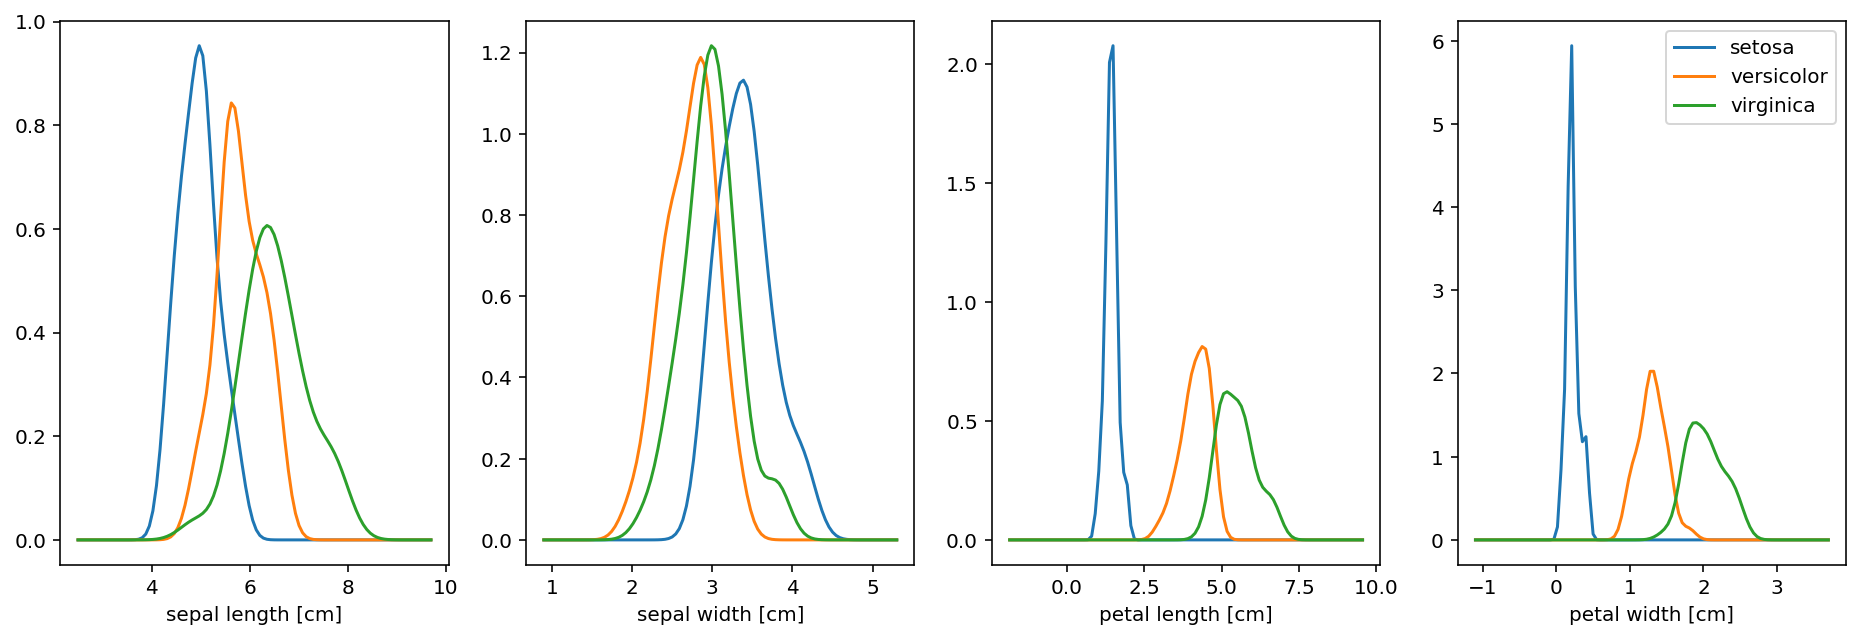

In [56]:
X = np.array(train_set)

fig, ax = plt.subplots(1,4,figsize=(16,5))
class_names = {v: k.split('-')[1] for k, v in convert.items()}
for var in range(4):
    xlim = min(X[:,var]),max(X[:,var])
    x = np.linspace(xlim[0]-.5*(xlim[1]-xlim[0]),xlim[1]+.5*(xlim[1]-xlim[0]),100)
    for iris in naive.kde:
        y = naive.kde[iris][var](x)
        ax[var].plot(x,y, label=class_names[iris])
        ax[var].set_xlabel(varnames[var])
    plt.legend()
plt.show()

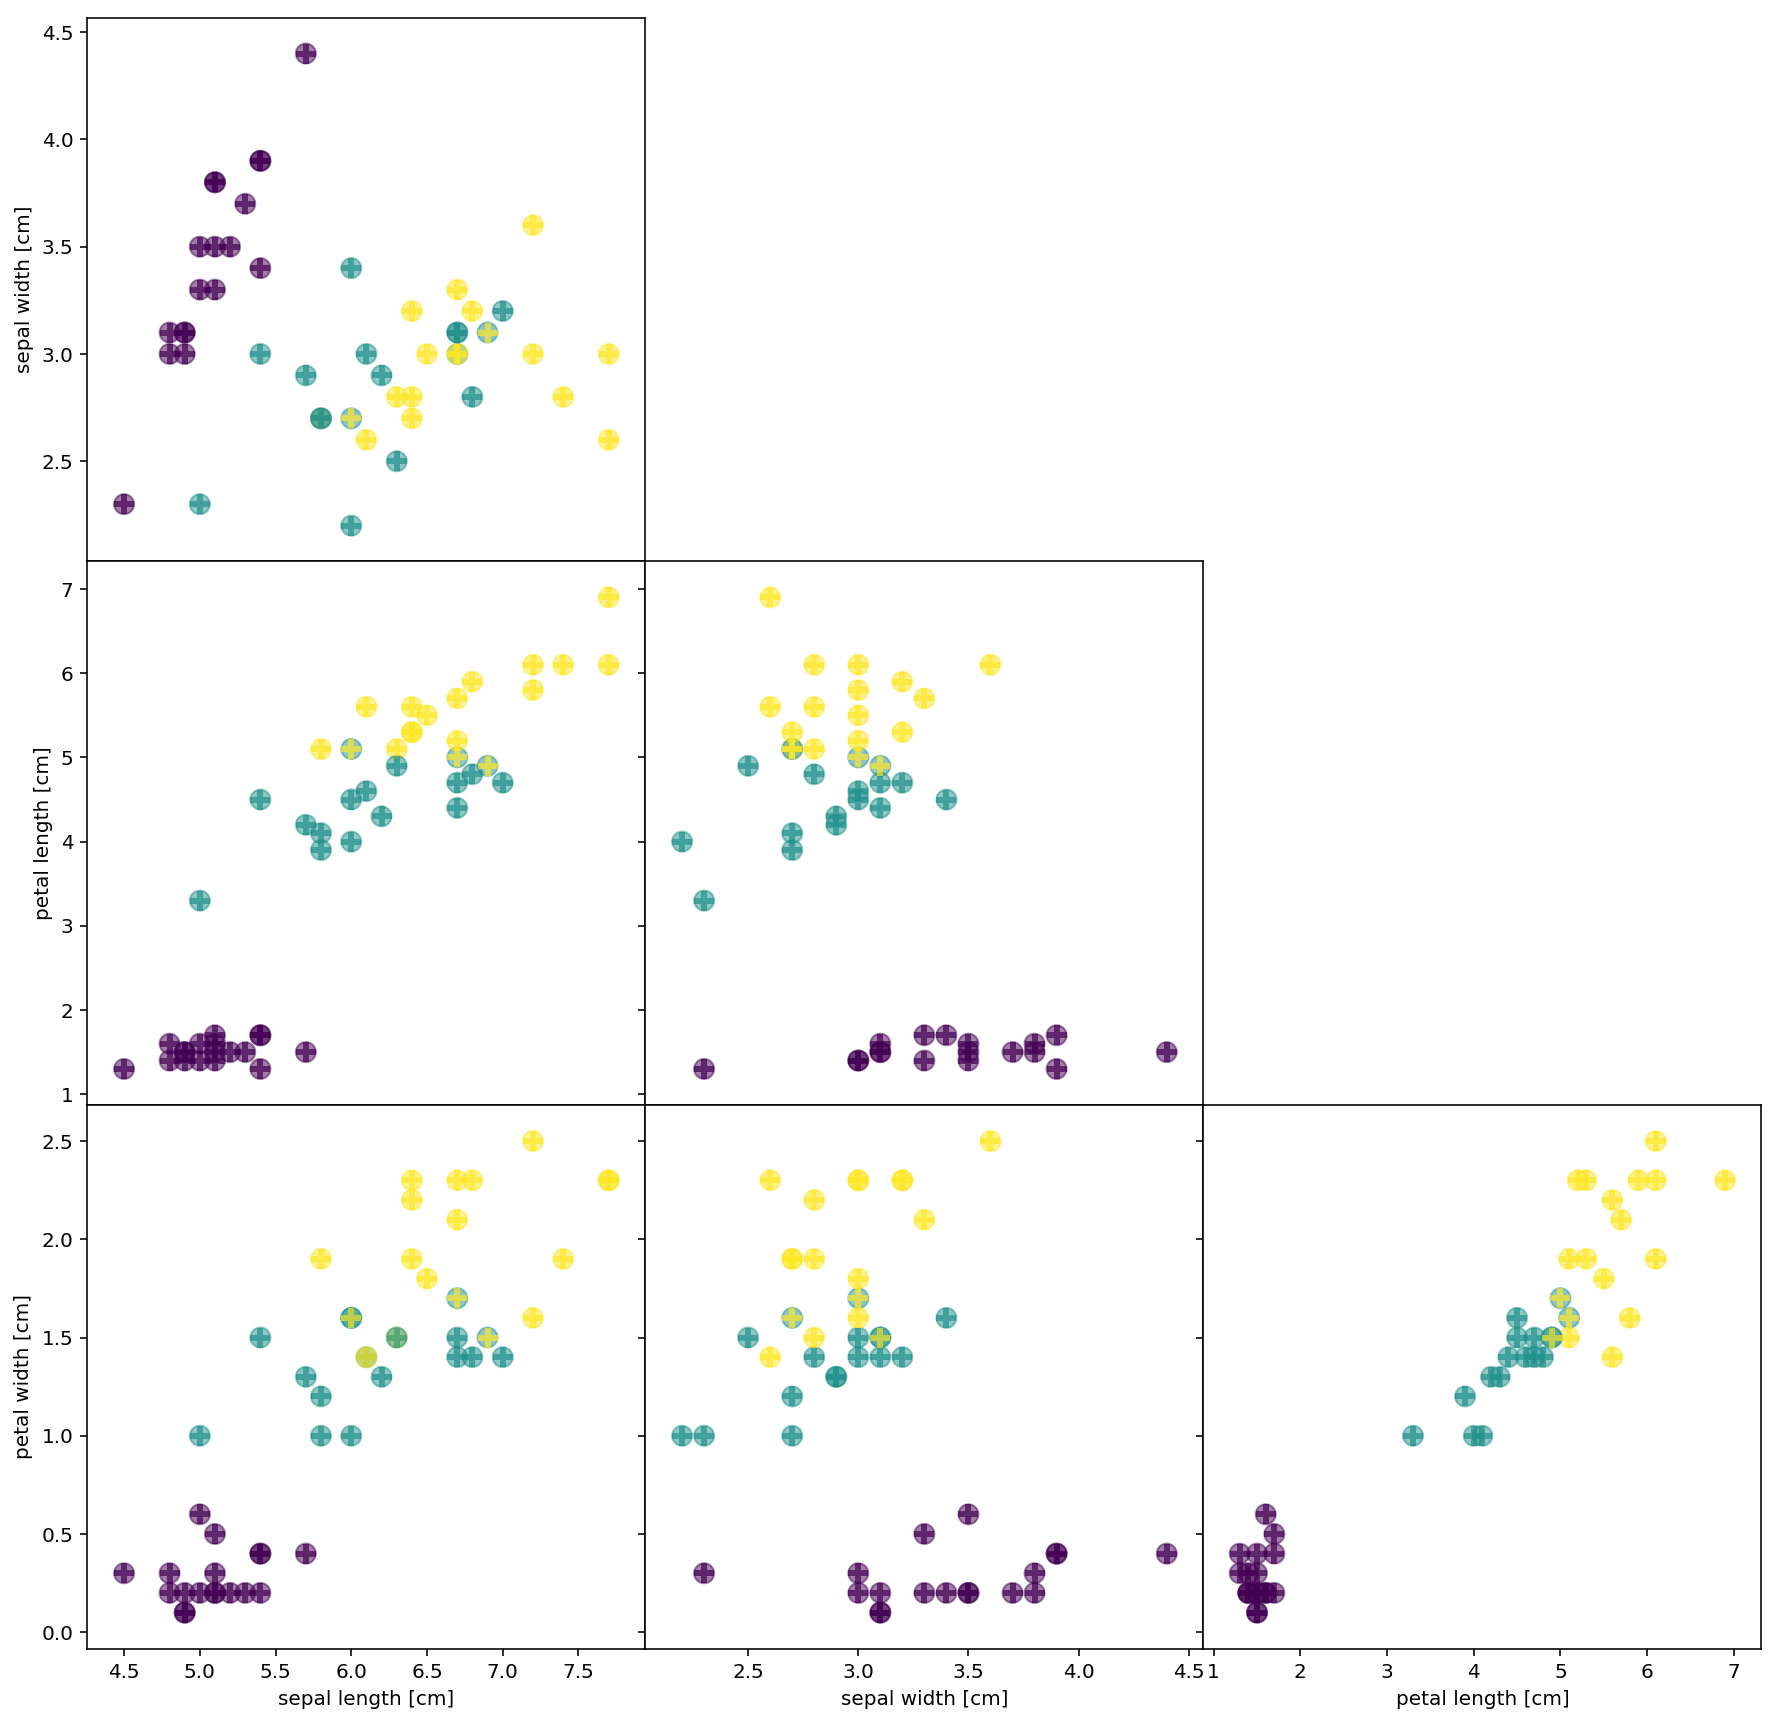

In [57]:
from matplotlib import patches, colors

X = np.asarray(test_set)
Y = np.array([naive(data) for data in test_set])
dim = len(dataset[0])-1
fig, ax = plt.subplots(dim-1, dim-1, figsize=(15,15), sharex='col', sharey='row')
for i in range(dim-1):
    for j in range(dim-1):
        if j>i: 
            ax[i][j].set_visible(False)
        else:
            ax[i][j].scatter(X[:, j], X[:, i+1], c=X[:,-1], s=100, alpha=.5)
            ax[i][j].scatter(X[:, j], X[:, i+1], c=Y, s=100, zorder=10, marker='+', lw=3, alpha=.7)
            if i==2: ax[i][j].set_xlabel(varnames[j])
            if j==0: ax[i][j].set_ylabel(varnames[i+1])
plt.subplots_adjust(wspace=0., hspace=0.)
plt.show()

In [58]:
def accuracy(actual, predicted):
    diff = np.asarray(actual)-np.asarray(predicted)
    print ('accuracy:', (1.-float(np.count_nonzero(diff))/diff.shape[0])*100,'%')

accuracy(Y, X[:,-1])

accuracy: 94.0 %
